# K-Means

In [1]:
#https://www.askpython.com/python/examples/k-means-clustering-from-scratch

## The 5 Steps in K-means Clustering Algorithm
1. Randomly pick k data points as our initial Centroids.
2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.
3. Now assign each data point to the closest centroid according to the distance found.
4. Update centroid location by taking the average of the points in each cluster group.
5. Repeat the Steps 2 to 4 till our centroids don’t change.

In [2]:
import numpy as np
from scipy.spatial.distance import cdist 

In [3]:
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

## Testing the K-Means Clusters

In [4]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df, 10, 1000)

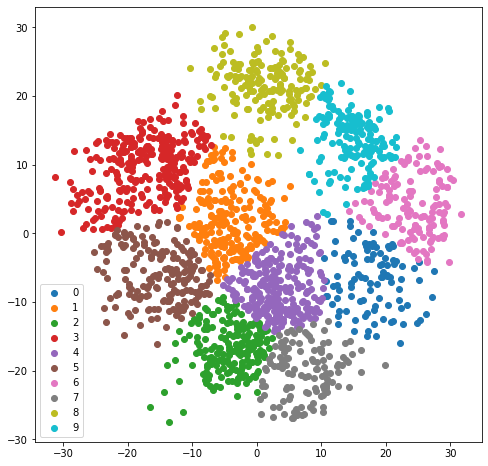

In [8]:
#Visualize the results
 
u_labels = np.unique(label)
plt.figure(figsize = (8,8))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()